In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

### 1 - Exploration et nettoyage des données

In [14]:
#  Chargement des données
data_appart = pd.read_csv('data/house_data.csv')

In [3]:
# Description des données
data_appart.describe()

,price,surface,arrondissement
count,827.000000,822.000000,822.000000
mean,2007.342201,58.045925,4.142336
std,1890.894229,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1050.000000,28.655000,2.000000
50%,1567.000000,46.100000,3.000000
75%,2346.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000


In [4]:
# Suppression des valeurs manquantes 
data_appart = data_appart.dropna()

# Compte tenue des outliers Filtrons
data = data_appart['price'] < 8000

# Réindexation
data = data_appart.reset_index(drop = True)

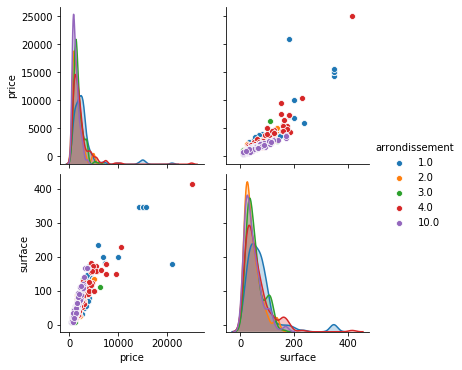

In [12]:
# Affichage des données nettoyés
sns.pairplot(data,hue='arrondissement')
#data.plot.scatter('price','surface',c='arrondissement',colormap='viridis')

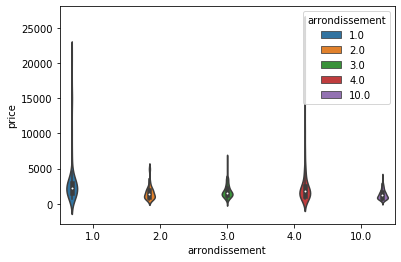

In [28]:
sns.violinplot(x='arrondissement',y='price',data=data,hue='arrondissement')

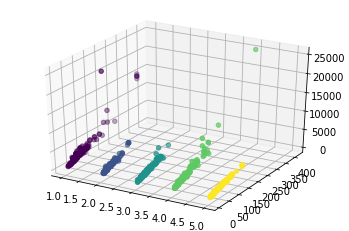

In [35]:
fig = plt.figure().gca(projection='3d')

# Pour faciliter la visualisation, on va changer la valeur de l'arrondissement (10)
tmp_arr = data['arrondissement'][:]
tmp_arr[tmp_arr == 10] = 5

fig.scatter(tmp_arr, data['surface'], data['price'], c=tmp_arr, cmap="viridis")
plt.show()

In [41]:
x = data.drop('price',axis=1)
y = data['price']

In [44]:
model = LinearRegression()
model.fit(x,y)
model.score(x,y)
prediction = model.predict(x)

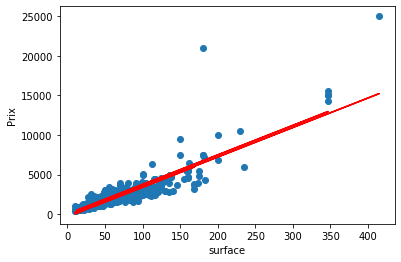

In [55]:
plt.scatter(data['surface'],data['price'])
plt.xlabel('surface')
plt.ylabel('Prix')
plt.plot(data['surface'],prediction,color="red")

In [59]:
def predLoyer(model,surface,arrondissement):
    x = np.array([surface,arrondissement]).reshape(1,2)
    print(model.predict(x))

In [69]:
predLoyer(model,0,1)

[37.76160177]
